![Preprocessing](images/preprocessing.png)

### Dataset Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("TATAELXSI.csv")

In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
df.size

95250

In [5]:
df.shape

(6350, 15)

In [6]:
df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1295,2001-03-09,TATAELXSI,EQ,90.70,89.15,89.15,76.30,80.00,80.05,80.40,547491,4.401909e+12,NaN,NaN,NaN
903,1999-08-18,TATAELXSI,EQ,97.35,105.10,105.15,104.90,105.15,105.15,105.15,64600,6.792520e+11,NaN,NaN,NaN
70,1996-04-15,TATAELXSI,EQ,21.55,21.50,21.90,21.15,NaN,21.20,21.31,2400,5.115500e+09,NaN,NaN,NaN
616,1998-07-01,TATAELXSI,EQ,34.20,35.90,35.90,32.00,33.70,33.85,33.37,52000,1.735005e+11,NaN,NaN,NaN
614,1998-06-29,TATAELXSI,EQ,34.00,33.00,34.30,32.50,34.30,34.30,34.01,26800,9.116000e+10,NaN,NaN,NaN


In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6350.000000,6350.000000,6350.000000,6350.000000,5802.000000,6350.000000,6350.000000,6.350000e+03,6.350000e+03,2501.000000,4.843000e+03,4843.000000
mean,478.421606,479.631701,489.313008,470.537520,522.499319,479.087717,480.476575,3.399589e+05,2.599541e+13,19139.763695,8.891948e+04,0.364045
std,628.651814,630.413236,642.552553,619.534417,643.352962,630.397547,631.753621,5.517473e+05,6.405415e+13,23143.701212,9.871371e+04,0.183766
min,0.000000,14.200000,14.200000,13.750000,26.200000,13.900000,13.970000,5.770000e+02,1.420000e+09,89.000000,5.760000e+02,0.054700
25%,94.000000,94.662500,96.700000,92.150000,115.500000,94.000000,94.542500,4.167575e+04,6.069436e+11,5131.000000,2.609550e+04,0.213950
50%,203.900000,204.925000,208.525000,200.250000,218.000000,203.900000,204.535000,1.611925e+05,2.515265e+12,14267.000000,6.082600e+04,0.329800
75%,631.300000,631.887500,644.900000,619.000000,806.250000,631.487500,632.300000,4.310442e+05,2.737311e+13,24842.000000,1.165655e+05,0.487600
max,4304.300000,4375.300000,4410.000000,4165.000000,4350.000000,4304.300000,4248.370000,9.825204e+06,1.768214e+15,387872.000000,1.808203e+06,0.998300


In [8]:
import matplotlib.pyplot as plt

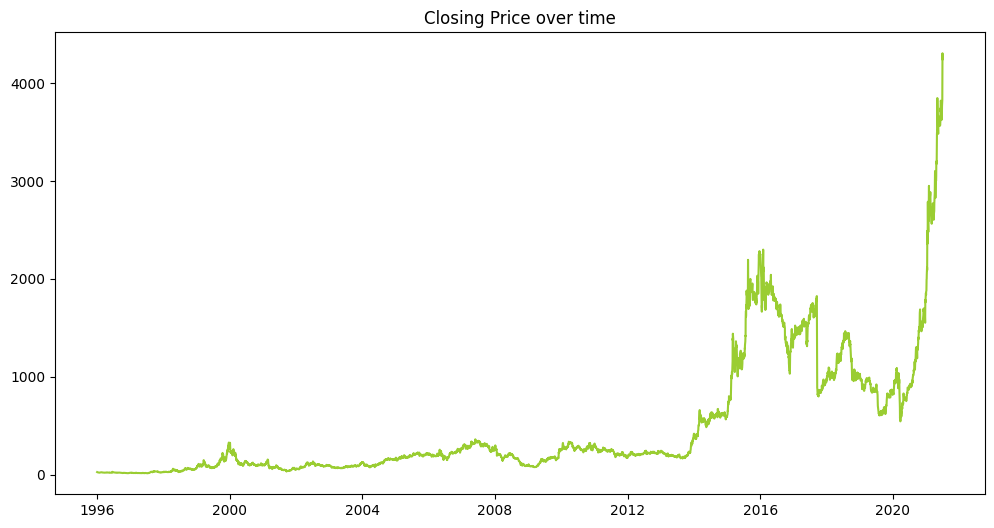

In [9]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df["Date"]
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price", color="yellowgreen")
plt.title("Closing Price over time")
plt.show()

### Feature Building

In [10]:
# keeping only 2 features Date & Close (Closing Price) for prediction
df = df[["Date", "Close"]]

In [11]:
# dropping null
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [12]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [13]:
# setting Date as index for the Dataframe
df.index = df.Date

In [14]:
df.head()

,Date,Close
Date,,
1996-01-01,1996-01-01,25.95
1996-01-02,1996-01-02,24.95
1996-01-03,1996-01-03,24.95
1996-01-04,1996-01-04,24.10
1996-01-05,1996-01-05,24.25


In [15]:
# dropping the Date column after setting it as index
df.drop('Date', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6350 entries, 1996-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6350 non-null   float64
dtypes: float64(1)
memory usage: 99.2 KB


#### Training & Validation Data Preparation

In [17]:
data = df.values

In [18]:
data

array([[  25.95],
       [  24.95],
       [  24.95],
       ...,
       [4002.95],
       [4304.3 ],
       [4243.75]])

In [19]:
# Splitting the dataset into training and validation sets
training_index = 0
validation_index = int(len(data) * 0.8)

training_data = data[training_index:validation_index,:]
validation_data = data[validation_index:,:]

In [21]:
actual = data[validation_index:,:]

In [22]:
training_data

array([[  25.95],
       [  24.95],
       [  24.95],
       ...,
       [1904.15],
       [1899.8 ],
       [1923.85]])

In [23]:
validation_data

array([[1919.7 ],
       [1875.05],
       [1844.95],
       ...,
       [4002.95],
       [4304.3 ],
       [4243.75]])

In [24]:
training_data.shape, validation_data.shape

((5080, 1), (1270, 1))

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [27]:
scaler

MinMaxScaler()

In [28]:
scaled_data = scaler.fit_transform(data)

In [29]:
scaled_data

array([[0.0028086 ],
       [0.00257552],
       [0.00257552],
       ...,
       [0.92976179],
       [1.        ],
       [0.9858871 ]])

In [30]:
import numpy as np

In [31]:
x_train = []
y_train = []
time_steps = 180
size_train = len(training_data)

for i in range(time_steps, size_train):
    x_train.append(scaled_data[i - time_steps : i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train

array([[0.0028086 , 0.00257552, 0.00257552, ..., 0.00122366, 0.00124697,
        0.0011887 ],
       [0.00257552, 0.00257552, 0.0023774 , ..., 0.00124697, 0.0011887 ,
        0.00123532],
       [0.00257552, 0.0023774 , 0.00241236, ..., 0.0011887 , 0.00123532,
        0.00129359],
       ...,
       [0.41261887, 0.49434785, 0.50818106, ..., 0.43262866, 0.43025126,
        0.44089129],
       [0.49434785, 0.50818106, 0.48605025, ..., 0.43025126, 0.44089129,
        0.44057664],
       [0.50818106, 0.48605025, 0.4767038 , ..., 0.44089129, 0.44057664,
        0.43956274]])

In [33]:
# Reshaping input data: [samples, time steps, features] for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
x_train

array([[[0.0028086 ],
        [0.00257552],
        [0.00257552],
        ...,
        [0.00122366],
        [0.00124697],
        [0.0011887 ]],

       [[0.00257552],
        [0.00257552],
        [0.0023774 ],
        ...,
        [0.00124697],
        [0.0011887 ],
        [0.00123532]],

       [[0.00257552],
        [0.0023774 ],
        [0.00241236],
        ...,
        [0.0011887 ],
        [0.00123532],
        [0.00129359]],

       ...,

       [[0.41261887],
        [0.49434785],
        [0.50818106],
        ...,
        [0.43262866],
        [0.43025126],
        [0.44089129]],

       [[0.49434785],
        [0.50818106],
        [0.48605025],
        ...,
        [0.43025126],
        [0.44089129],
        [0.44057664]],

       [[0.50818106],
        [0.48605025],
        [0.4767038 ],
        ...,
        [0.44089129],
        [0.44057664],
        [0.43956274]]])

In [35]:
y_train

array([0.00123532, 0.00129359, 0.00108382, ..., 0.44057664, 0.43956274,
       0.44516828])

In [36]:
dataset_size = len(df)
test_size = len(validation_data)
test_inputs = df[dataset_size - test_size - time_steps :].values

In [37]:
test_inputs = test_inputs.reshape(-1, 1)

In [38]:
test_inputs

array([[2099.25],
       [2059.15],
       [1691.8 ],
       ...,
       [4002.95],
       [4304.3 ],
       [4243.75]])

In [39]:
test_inputs = scaler.transform(test_inputs)

In [40]:
test_inputs.shape

(1450, 1)

In [41]:
x_test = []
y_test = []
len_test = test_inputs.shape[0]

for i in range(time_steps, len_test):
    x_test.append(test_inputs[i - time_steps : i, 0])
    y_test.append(scaled_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [42]:
x_test

array([[0.48605025, 0.4767038 , 0.39108242, ..., 0.44057664, 0.43956274,
        0.44516828],
       [0.4767038 , 0.39108242, 0.4082603 , ..., 0.43956274, 0.44516828,
        0.44420101],
       [0.39108242, 0.4082603 , 0.41412223, ..., 0.44516828, 0.44420101,
        0.43379405],
       ...,
       [0.31866493, 0.32340807, 0.32168329, ..., 0.86850876, 0.8751515 ,
        0.88856517],
       [0.32340807, 0.32168329, 0.34067919, ..., 0.8751515 , 0.88856517,
        0.92976179],
       [0.32168329, 0.34067919, 0.33663528, ..., 0.88856517, 0.92976179,
        1.        ]])

In [43]:
y_test

array([0.00123532, 0.00129359, 0.00108382, ..., 0.00645627, 0.0062465 ,
       0.00646793])

![Model Training](images/training.png)

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
model = Sequential()

In [46]:
from tensorflow.keras.layers import LSTM, Dense

In [47]:
from keras.layers import Dropout

In [48]:
# Model Architecture
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(rate=0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.3))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(rate=0.3))
model.add(Dense(1))

In [49]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 180, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 180, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [50]:
# Model Compilation, using mean squared error & adam optimizer
model.compile(loss="mean_squared_error", optimizer="adam")

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
# Defining early stopping criteria
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

In [53]:
# Model Training with Early Stopping
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/100



39/39 [==============================] - 69s 1s/step - loss: 0.0022 - val_loss: 0.0767
Epoch 2/100
39/39 [==============================] - 42s 1s/step - loss: 4.7070e-04 - val_loss: 0.1068
Epoch 3/100
39/39 [==============================] - 45s 1s/step - loss: 3.8127e-04 - val_loss: 0.0912
Epoch 4/100
39/39 [==============================] - 43s 1s/step - loss: 3.6631e-04 - val_loss: 0.0946
Epoch 5/100
39/39 [==============================] - 47s 1s/step - loss: 3.2564e-04 - val_loss: 0.1416
Epoch 6/100
39/39 [==============================] - 45s 1s/step - loss: 3.4062e-04 - val_loss: 0.0978


![Stocks Price Prediction - LSTM](images/prediction.png)

In [54]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

40/40 [==============================] - 9s 124ms/step


In [56]:
prediction

array([[1661.7218],
       [1659.7279],
       [1657.8248],
       ...,
       [2954.921 ],
       [2958.814 ],
       [2963.3037]], dtype=float32)

In [57]:
prediction[-1], actual[-1]

(array([2963.3037], dtype=float32), array([4243.75]))

C:\Users\anike\AppData\Local\Temp\ipykernel_19360\1130954356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["predictions"] = prediction


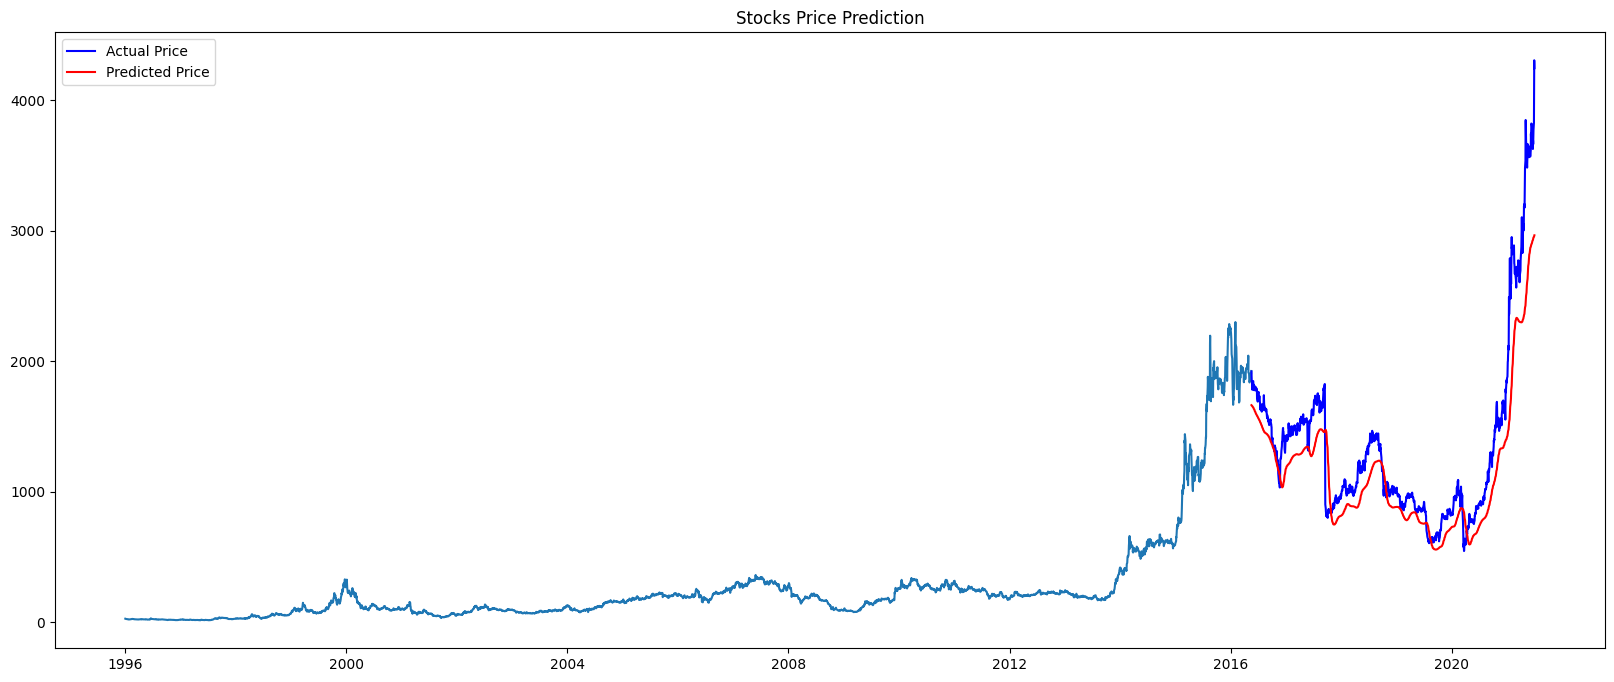

In [58]:
training = df[training_index:validation_index]
validation = df[validation_index:]
validation["predictions"] = prediction
plt.figure(figsize=(20, 8))
plt.plot(training["Close"])
plt.plot(validation["Close"], color="blue", label="Actual Price")
plt.plot(validation["predictions"], color="red", label="Predicted Price")
plt.title("Stocks Price Prediction")
plt.legend()
plt.show()

In [59]:
# Assuming 'model' is your trained LSTM model
model.save("lstm_stock_prediction_model.h5")

c:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 5s 125ms/step


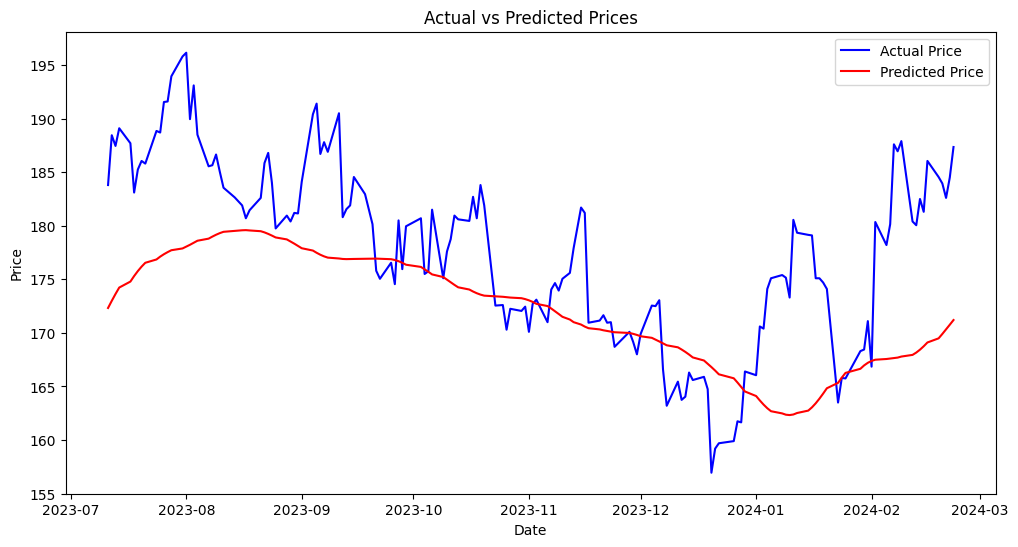

In [79]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv("ABCAPITAL.csv")

# Preprocessing the dataset
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.index = df["Date"]
df = df[["Close"]]
df.dropna(inplace=True)

# Scaling the dataset using the same scaler used for training
data = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating sequences for the dataset
x = []
time_steps = 90
for i in range(time_steps, len(scaled_data)):
    x.append(scaled_data[i - time_steps : i, 0])
x = np.array(x)

# Pad sequences to match expected length of 180
x = pad_sequences(x, maxlen=180, dtype="float32", padding="pre", truncating="pre")

# Loading the trained LSTM model
loaded_model = load_model("lstm_stock_prediction_model.h5")

# Making predictions using the loaded model
prediction = loaded_model.predict(x)

# Inverse transform the predictions to get actual stock prices
prediction = scaler.inverse_transform(prediction)

# Create a new DataFrame for validation with predicted prices
validation = df[time_steps:].copy()
validation["Predicted_Price"] = prediction

# Plotting actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(validation.index, validation["Close"], label="Actual Price", color="blue")
plt.plot(validation.index, prediction, label="Predicted Price", color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [80]:
# Creating DataFrames for validation and predictions
df_validation_pred = pd.DataFrame(
    {"Actual": validation["Close"].values, "Predicted": prediction.flatten()}
)

# Printing the Comparison DataFrame
df_validation_pred.head()

,Actual,Predicted
0,183.80,172.325500
1,188.45,172.993118
2,187.45,173.631195
3,189.10,174.231567
4,187.70,174.790405
